# SIR Modelling

In [2]:
import pandas as pd
import numpy as np

from datetime import datetime

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)




In [53]:
df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';',parse_dates=['date'])  
df_analyse.sort_values('date',ascending=True)

,date,Italy,US,Spain,Germany,"Korea, South",India
0,2020-01-22,0,1,0,0,1,0
1,2020-01-23,0,1,0,0,1,0
2,2020-01-24,0,2,0,0,2,0
3,2020-01-25,0,2,0,0,2,0
4,2020-01-26,0,5,0,0,3,0
5,2020-01-27,0,5,0,1,4,0
6,2020-01-28,0,5,0,4,4,0
7,2020-01-29,0,5,0,4,4,0
8,2020-01-30,0,5,0,4,4,1
9,2020-01-31,2,7,0,5,11,1


In [84]:
df_analyse['Germany']

0           0
1           0
2           0
3           0
4           0
5           1
6           4
7           4
8           4
9           5
10          8
11         10
12         12
13         12
14         12
15         12
16         13
17         13
18         14
19         14
20         16
21         16
22         16
23         16
24         16
25         16
26         16
27         16
28         16
29         16
30         16
31         16
32         16
33         16
34         17
35         27
36         46
37         48
38         79
39        130
40        159
41        196
42        262
43        482
44        670
45        799
46       1040
47       1176
48       1457
49       1908
50       2078
51       3675
52       4585
53       5795
54       7272
55       9257
56      12327
57      15320
58      19848
59      22213
60      24873
61      29056
62      32986
63      37323
64      43938
65      50871
66      57695
67      62095
68      66885
69      71808
70      77872
71    

In [428]:
#a=np.array(np.nonzero(np.array(df_analyse['Germany'])))
b=df_analyse['Germany'][int(np.array(np.nonzero(np.array(df_analyse['Germany'])))[:,0])]
c=df_analyse['Germany'][int(a[:,-1])]
print(c,b)

203325 1


In [433]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'
N0=1000000               #c/0.03
beta=0.4
gamma=0.1

I0 =df_analyse['Germany'][35]
S0=N0-I0
R0=0
I0

27

In [391]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    '''
    #gamma=0
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

# Simulative approach

In [437]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                      'infected':I0,
                                      'recovered':R0})
for each_t in np.arange(len(df_analyse['Germany'])):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

In [438]:
propagation_rates

,susceptible,infected,recovered
0,999962.200292,35.099708,2.700000
1,999948.160939,45.629090,6.209971
2,999929.910249,59.316871,10.772880
3,999906.185164,77.110269,16.704567
4,999875.343949,100.240457,24.415594
5,999835.252765,130.307595,34.439640
6,999783.138314,169.391287,47.470399
7,999715.396493,220.193979,64.409528
8,999627.343968,286.227106,86.428926
9,999512.895792,372.052572,115.051636


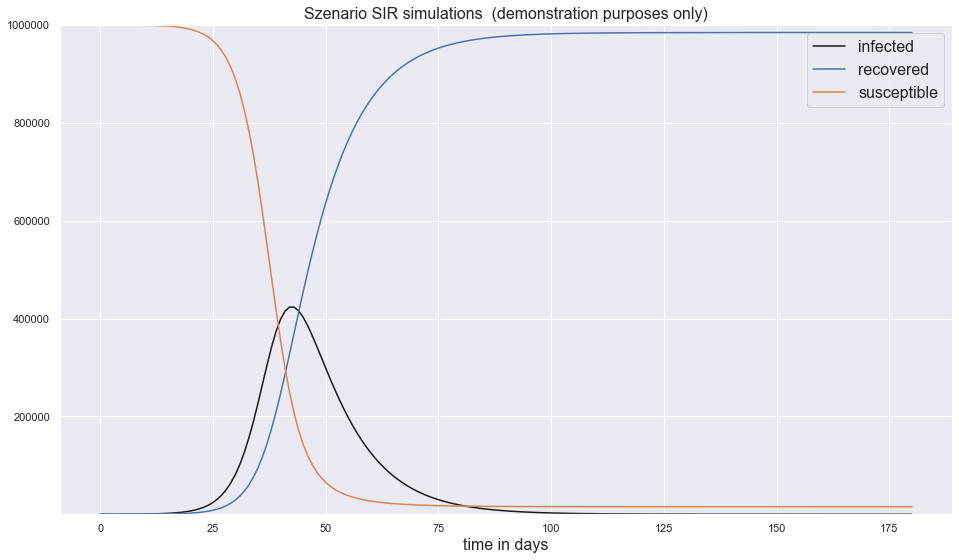

In [442]:
from plotly.tools import mpl_to_plotly
ax1=plt.figure()
plt.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
plt.plot(propagation_rates.index,propagation_rates.recovered,label='recovered',)
plt.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible',)
plt.ylim(10,1000000)
plt.yscale('linear')
plt.title('Szenario SIR simulations  (demonstration purposes only)',size=16)
plt.xlabel('time in days',size=16)
plt.legend(loc='best',prop={'size':16})


In [286]:
ydata = np.array(df_analyse.Germany[35:])
t=np.arange(len(ydata))

In [287]:
# ensure re-initialization 

I0=ydata[0]
S0=N0-I0
R0=0
beta

0.4

In [288]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [289]:


def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [290]:
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([2.70000000e+01, 3.64457071e+01, 4.91956207e+01, 6.64053493e+01,
       8.96344660e+01, 1.20987564e+02, 1.63304428e+02, 2.20416326e+02,
       2.97491205e+02, 4.01498275e+02, 5.41832616e+02, 7.31153728e+02,
       9.86509149e+02, 1.33083608e+03, 1.79496099e+03, 2.42024936e+03,
       3.26209305e+03, 4.39445723e+03, 5.91573047e+03, 7.95611026e+03,
       1.06866705e+04, 1.43300301e+04, 1.91720581e+04, 2.55731545e+04,
       3.39761277e+04, 4.49053964e+04, 5.89492486e+04, 7.67139399e+04,
       9.87375269e+04, 1.25356226e+05, 1.56531317e+05, 1.91671801e+05,
       2.29519056e+05, 2.68172791e+05, 3.05306626e+05, 3.38543581e+05,
       3.65876662e+05, 3.85989183e+05, 3.98379367e+05, 4.03287154e+05,
       4.01494345e+05, 3.94088591e+05, 3.82258097e+05, 3.67146745e+05,
       3.49770632e+05, 3.30982618e+05, 3.11468385e+05, 2.91760020e+05,
       2.72257377e+05, 2.53251232e+05, 2.34945074e+05, 2.17474127e+05,
       2.00921199e+05, 1.85329524e+05, 1.70712933e+05, 1.57063815e+05,
      

In [291]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

standard deviation errors :  [0.00324353 0.00301448]  start infect: 27
Optimal parameters: beta = 0.16864420156173332  and gamma =  0.061699395345633345


C:\Users\Sudharsan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
C:\Users\Sudharsan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Sudharsan\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Sudharsan\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [292]:
fitted=fit_odeint(t, *popt)

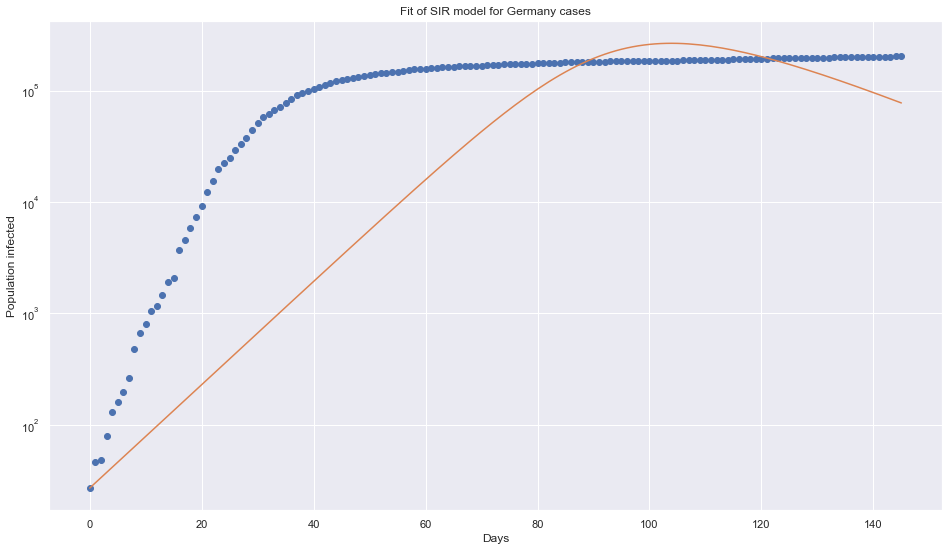

Optimal parameters: beta = 0.16864420156173332  and gamma =  0.061699395345633345
Basic Reproduction Number R0  2.733320166543071
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [293]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

# Dynamic Beta in SIR (Infection rate)

In [457]:
t_initial=1
t_intro_measures=52
t_hold=100
t_relax=21

beta_max=0.35
beta_min=0.005
gamma=0.05
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [458]:
pd_beta

array([0.35      , 0.35      , 0.34323529, 0.33647059, 0.32970588,
       0.32294118, 0.31617647, 0.30941176, 0.30264706, 0.29588235,
       0.28911765, 0.28235294, 0.27558824, 0.26882353, 0.26205882,
       0.25529412, 0.24852941, 0.24176471, 0.235     , 0.22823529,
       0.22147059, 0.21470588, 0.20794118, 0.20117647, 0.19441176,
       0.18764706, 0.18088235, 0.17411765, 0.16735294, 0.16058824,
       0.15382353, 0.14705882, 0.14029412, 0.13352941, 0.12676471,
       0.12      , 0.11323529, 0.10647059, 0.09970588, 0.09294118,
       0.08617647, 0.07941176, 0.07264706, 0.06588235, 0.05911765,
       0.05235294, 0.04558824, 0.03882353, 0.03205882, 0.02529412,
       0.01852941, 0.01176471, 0.005     , 0.005     , 0.005     ,
       0.005     , 0.005     , 0.005     , 0.005     , 0.005     ,
       0.005     , 0.005     , 0.005     , 0.005     , 0.005     ,
       0.005     , 0.005     , 0.005     , 0.005     , 0.005     ,
       0.005     , 0.005     , 0.005     , 0.005     , 0.005  

In [459]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

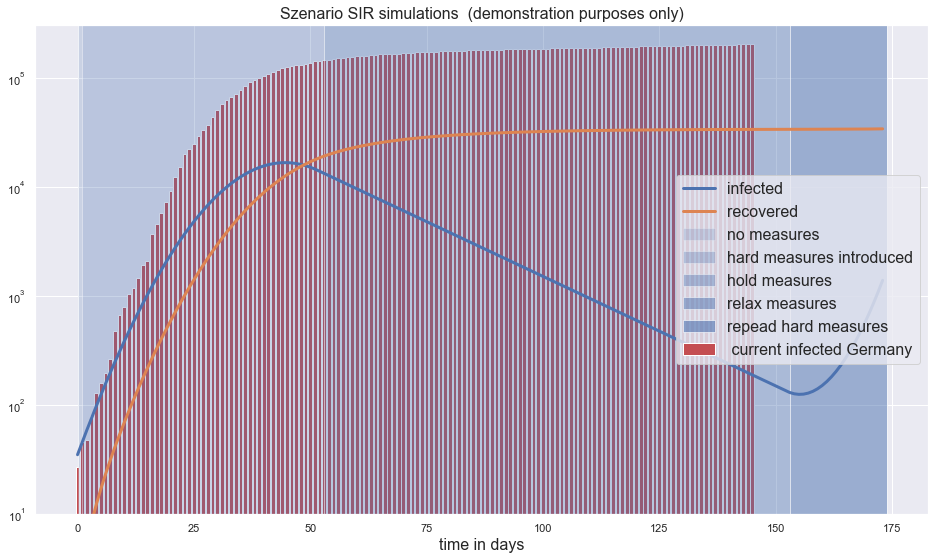

In [460]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered',linewidth=3)
t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected Germany',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 1.5*max(ydata))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

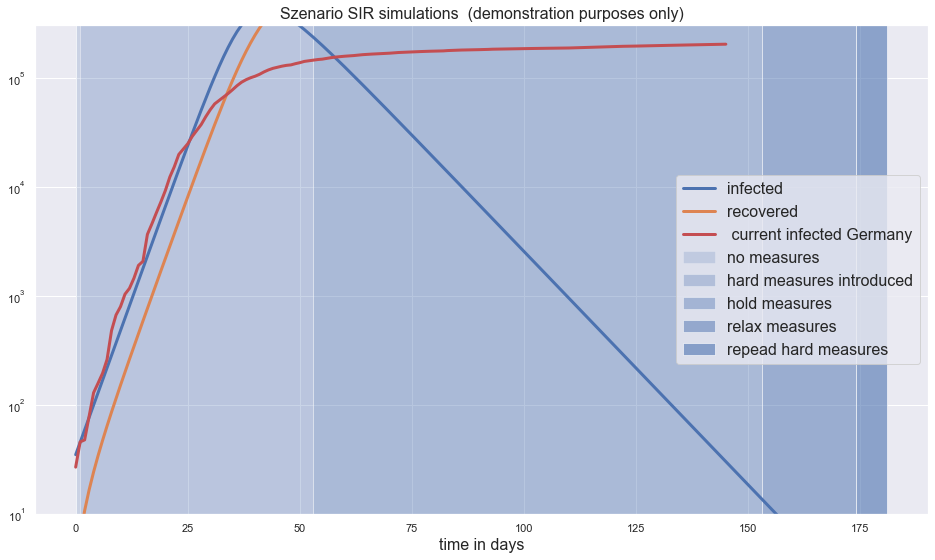

In [448]:
ax1 = plt.figure()

plt.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)
plt.plot(propagation_rates.index,propagation_rates.recovered,label='recovered',linewidth=3)
t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
plt.plot(np.arange(len(ydata)),ydata, linewidth=3,label=' current infected Germany',color='r')
plt.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
plt.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
plt.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
plt.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
plt.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

plt.ylim(10, 1.5*max(ydata))
plt.yscale('log')
plt.title('Szenario SIR simulations  (demonstration purposes only)',size=16)
plt.xlabel('time in days',size=16)
plt.legend(loc='best',
           prop={'size': 16});
traces = mpl_to_plotly(ax1)